<a href="https://colab.research.google.com/github/shannonshih/Tibame_GAD245-Practice-HW_0117/blob/main/04_03_Seaborn_Visualizing_distributions_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing distributions of data
* https://seaborn.pydata.org/tutorial/distributions.html

![image.png](attachment:70703e37-e55d-4a76-9dc9-0f5859f1ca22.png)

任何資料分析或建模工作的早期步驟都應該是了解變數是如何分佈的。分佈視覺化技術可以為許多重要問題提供快速答案。觀察範圍涵蓋哪些範圍？他們的中心傾向是什麼？它們是否嚴重偏向一個方向？有雙峰性的證據嗎？是否存在顯著的異常值？這些問題的答案是否因其他變數定義的子集而異？<BR>
而Seaborn提供了幾個不同的函數來達成這些功能
* The axes-level functions are histplot(), kdeplot(), ecdfplot(), and rugplot().
* They are grouped together within the figure-level displot(), jointplot(), and pairplot() functions.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# 繪製單變數直方圖
可視化分佈最常見的方法是直方圖。這是 displot() 中的預設方法，它使用與 histplot() 相同的底層程式碼。直方圖是一個長條圖，其中表示資料變數的軸被分成一組離散的箱，並且使用相應條的高度顯示落入每個箱內的觀測值的計數：

In [8]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


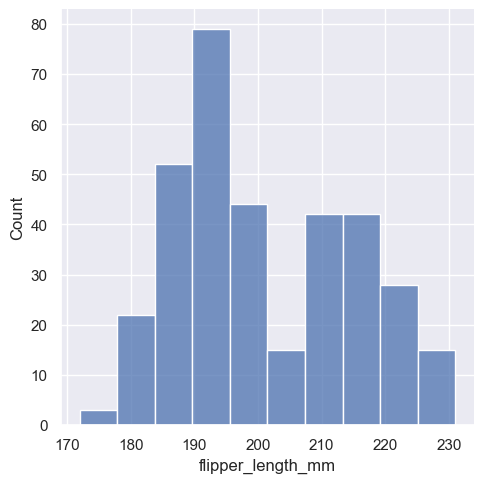

In [ ]:
sns.displot(penguins, x="flipper_length_mm") #這裡沒有指定y軸，因為y會用來表示直方圖的記數

該圖立即提供了有關 Flipper_length_mm 變數的一些見解。例如，我們可以看到最常見的鰭狀肢長度約為195毫米，但分佈呈雙峰，因此這個數字並不能很好地代表數據。

### 選擇 bin 的大小
bin的大小是一個重要參數，使用錯誤的bin大小可能會因為模糊資料的重要特徵或透過隨機變化創建明顯的特徵而產生誤導。預設情況下，displot()/histplot() 根據資料變異數和觀測值數量選擇預設箱大小。但您不應該過度依賴此類自動方法，因為它們依賴有關資料結構的特定假設。始終建議您檢查不同 bin 大小的分佈印像是否一致。若要直接選擇大小，請設定 binwidth 參數：

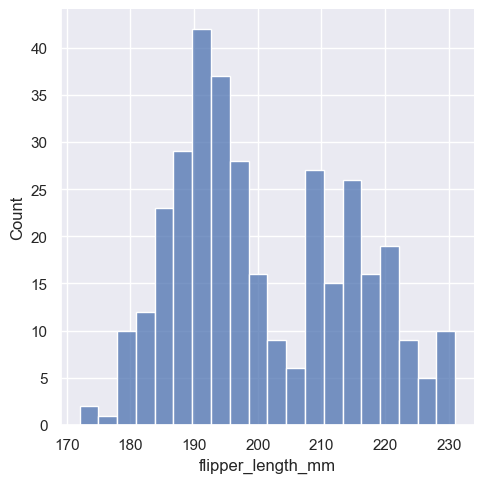

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

在其他情況下，指定 bin 的數量而不是它們的大小可能更有意義：

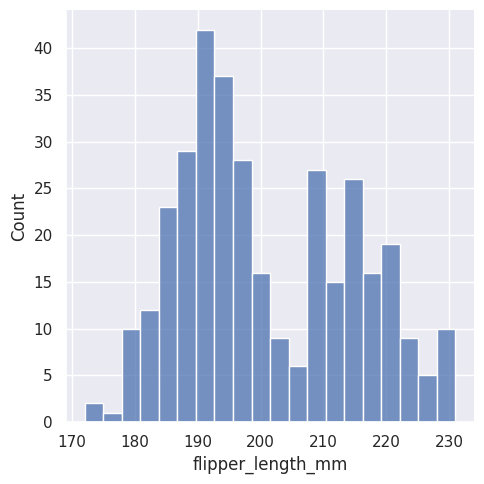

In [9]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

In [5]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


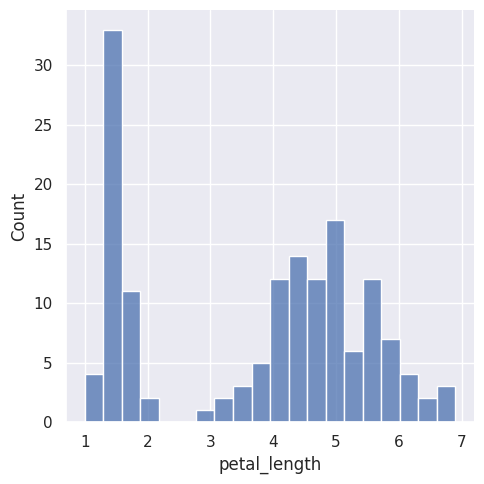

In [10]:
sns.displot(iris, x="petal_length", bins=20)

預設值失敗的情況的一個例子是變數採用相對較少數量的整數值。在這種情況下，預設的 bin 寬度可能太小，從而在分佈中產生尷尬的間隙：

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


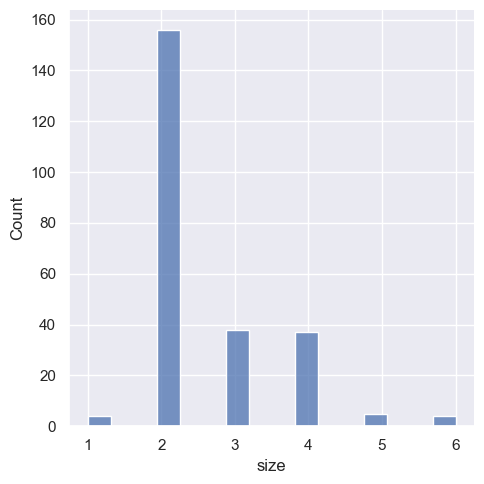

In [ ]:
sns.displot(tips, x="size")

一種方法是透過將陣列傳遞給 bin 來指定精確的 bin 分隔符號：

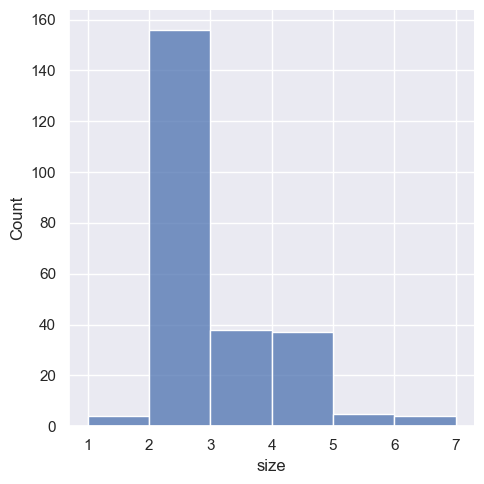

In [ ]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

這也可以透過設定 discrete=True 來實現，它選擇表示資料集中唯一值的bin分隔符，其中條形圖以其對應值為中心。

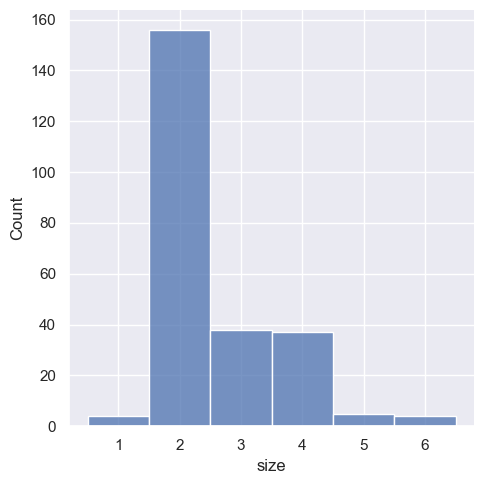

In [ ]:
sns.displot(tips, x="size", discrete=True) #就這個案子來說，這個方法會比上一個方法好

# 加入其他變數為條件
一旦了解了變數的分佈，下一步通常是詢問該分佈的特徵是否與資料集中的其他變數不同。例如，是什麼解釋了我們上面看到的鰭狀肢長度的雙峰分佈？ displot() 和 histplot() 透過色調語意提供條件子集設定的支援。將變數指派給色調將為每個唯一值繪製單獨的直方圖，並透過顏色區分它們：

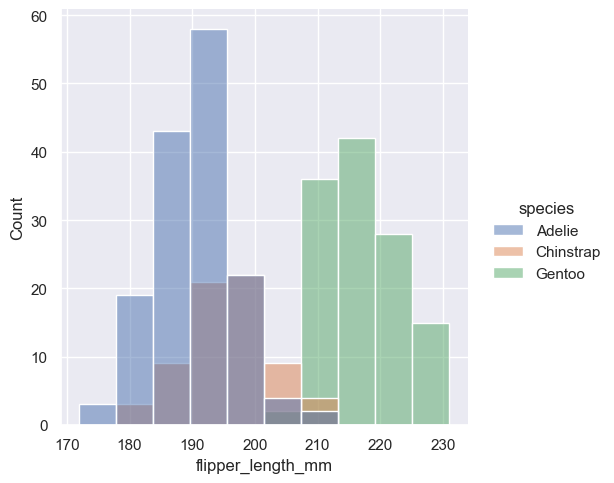

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

In [11]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


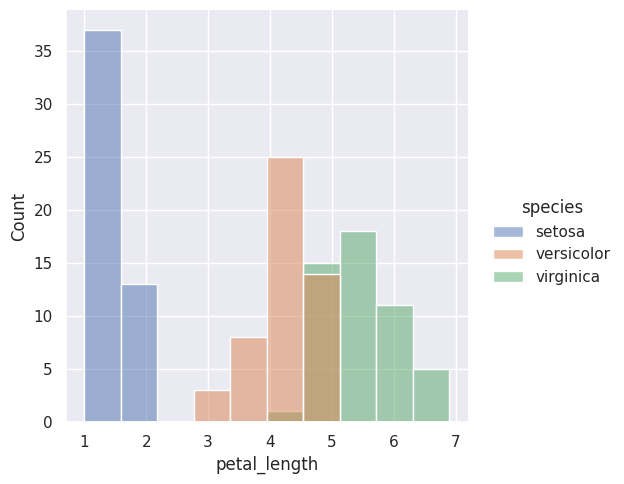

In [12]:
iris = sns.load_dataset("iris")
iris.head()
sns.displot(iris, x="petal_length", bins=10, hue='species')

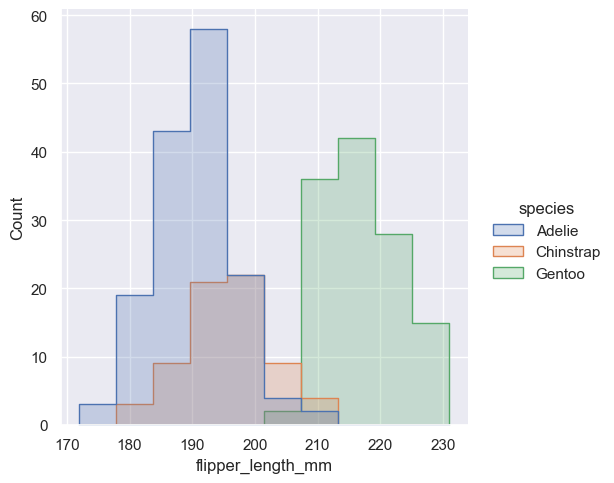

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

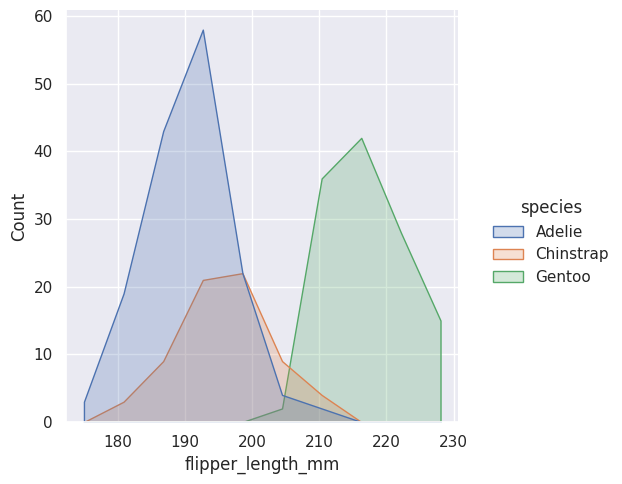

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="poly")

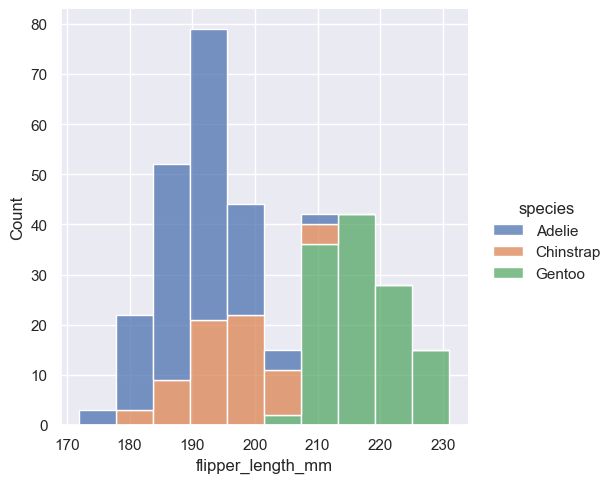

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

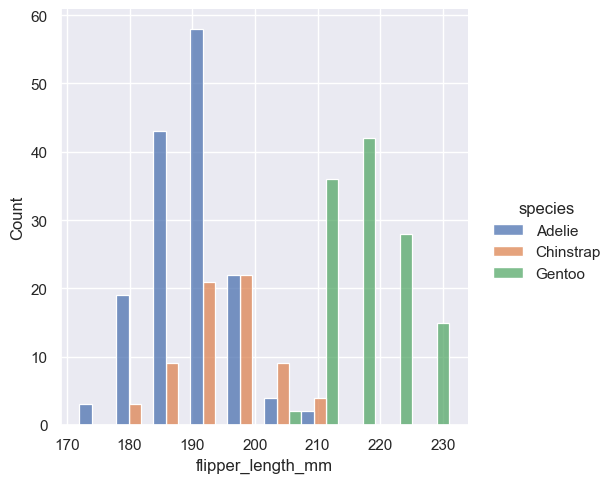

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="dodge")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

因為displot() 是圖形級函數並且繪製在FacetGrid 上，所以還可以透過將第二個變數分配給col 或row 而不是（或除了色調之外）來在單獨的子圖中繪製每個單獨的分佈。這很好地代表了每個子集的分佈，但它使得直接比較變得更加困難：

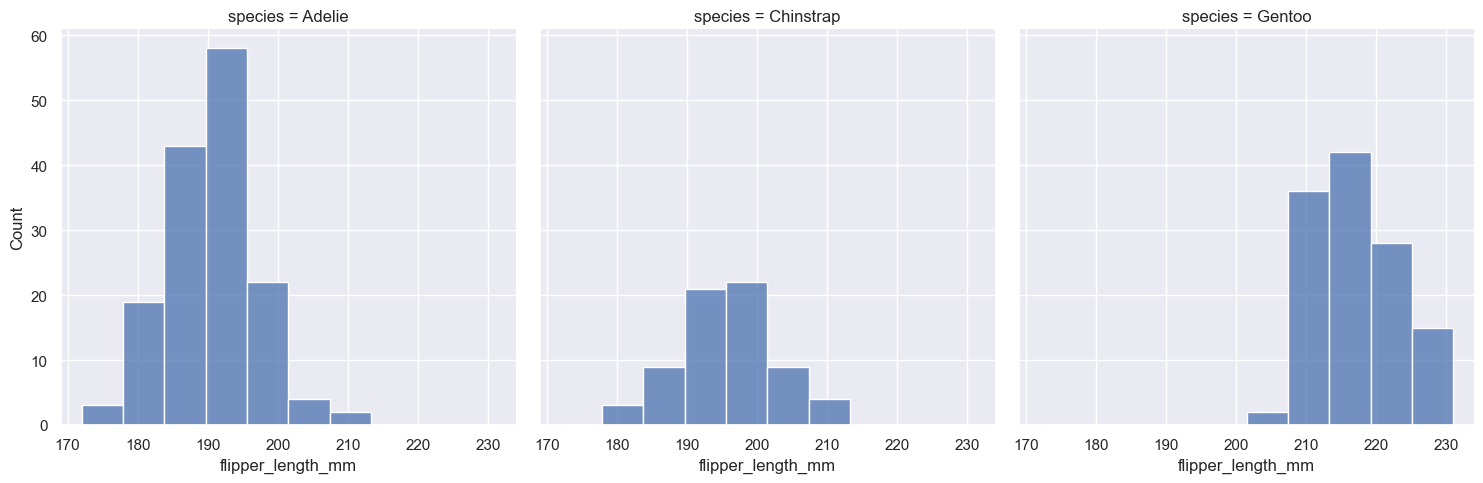

In [ ]:
sns.displot(penguins, x="flipper_length_mm", col="species")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

# Normalized histogram statistics
在我們這樣做之前，另一點需要注意的是，當子集的觀測數量不相等時，根據計數來比較它們的分佈可能並不理想。一種解決方案是使用 stat 參數對計數進行標準化：

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

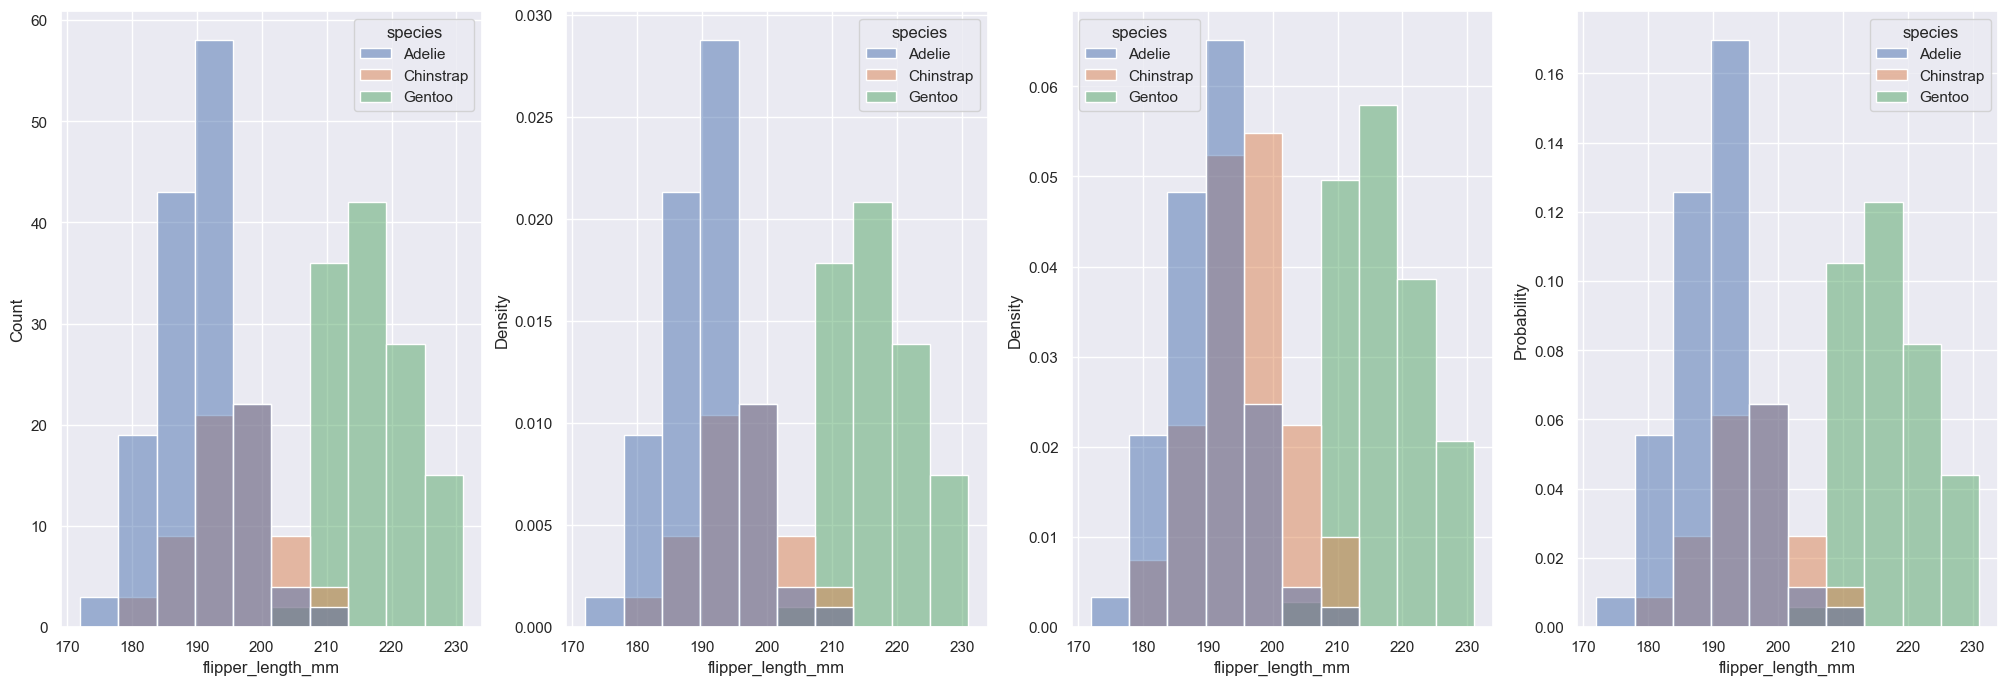

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 8))
#原本的教學範例是用displot()，但是這裡為了能夠同步比較不同參數的效果區別而採用subplots()，因此必須直接使用histplot()
sns.histplot(penguins, x="flipper_length_mm", hue="species", ax=axes[0])

#子集的觀測數量不相等時，根據計數來比較它們的分佈可能並不理想。一種解決方案是使用 stat 參數對計數進行標準化：
sns.histplot(penguins, x="flipper_length_mm", hue="species", stat="density", ax=axes[1]) #將原本的記數改成比例

#但是，預設情況下，標準化會套用於整個分佈，因此這只是重新調整條形的高度。透過設定 common_norm=False，每個子集將獨立標準化：
sns.histplot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False, ax=axes[2])

sns.histplot(penguins, x="flipper_length_mm", hue="species", stat="probability", ax=axes[3])

# Kernel density estimation
直方圖旨在近似透過對觀測值進行分箱(bin)和計數來產生資料的潛在機率密度函數。核密度估計（KDE）為同一問題提供了不同的解決方案。 KDE 圖不使用離散箱(bin)，而是使用高斯核平滑觀測值，從而產生連續密度估計：

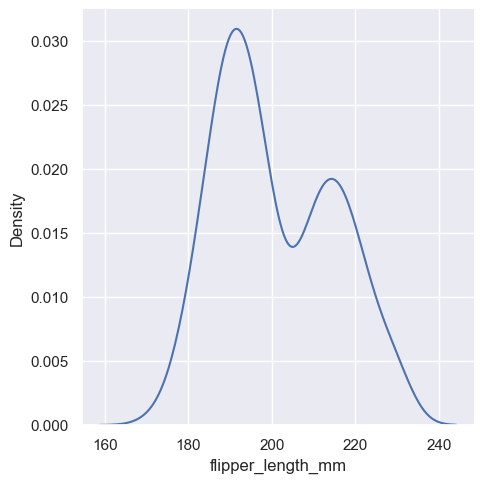

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

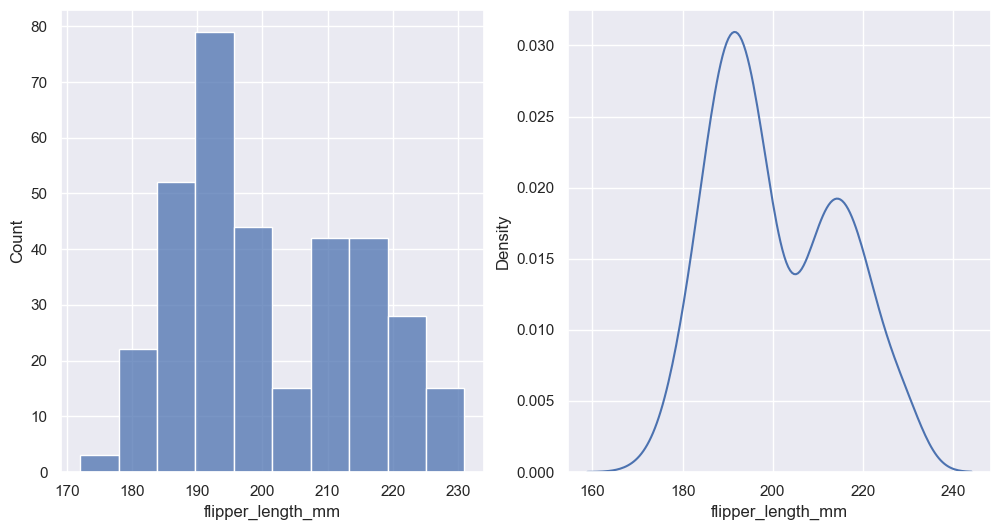

In [ ]:
# 將 histplot 跟 kdeplot 進行對比
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(penguins, x="flipper_length_mm", ax=axes[0])
sns.kdeplot(penguins, x="flipper_length_mm", ax=axes[1])

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

### 選擇平滑頻寬
與直方圖中的 bin 大小非常相似，KDE 準確表示資料的能力取決於平滑頻寬的選擇。過度平滑的估計可能會消除有意義的特徵，但平滑不足的估計可能會掩蓋隨機雜訊中的真實形狀。檢查估計穩健性最簡單的方法是調整預設頻寬：

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

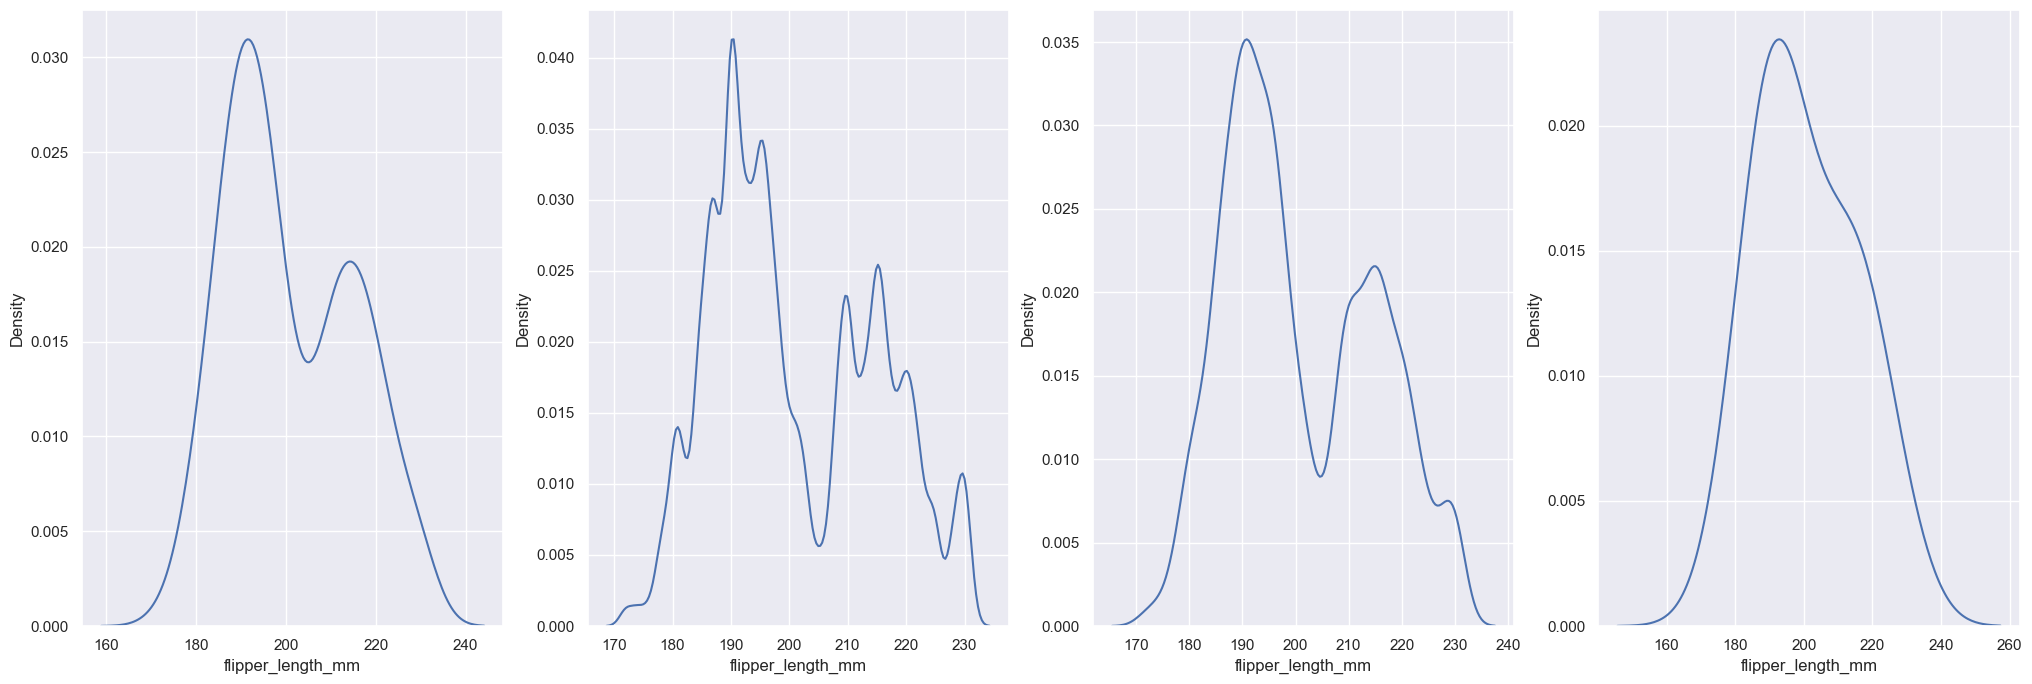

In [ ]:
# 將 histplot 跟 kdeplot 進行對比
fig, axes = plt.subplots(1, 4, figsize=(25, 8))
sns.kdeplot(penguins, x="flipper_length_mm", ax=axes[0]) #預設bw_adjust=1
sns.kdeplot(penguins, x="flipper_length_mm", bw_adjust=.25, ax=axes[1])
sns.kdeplot(penguins, x="flipper_length_mm", bw_adjust=.5, ax=axes[2])
sns.kdeplot(penguins, x="flipper_length_mm", bw_adjust=2, ax=axes[3])

與直方圖一樣，如果您指派hue變量，將為該變數的每個等級計算單獨的密度估計：

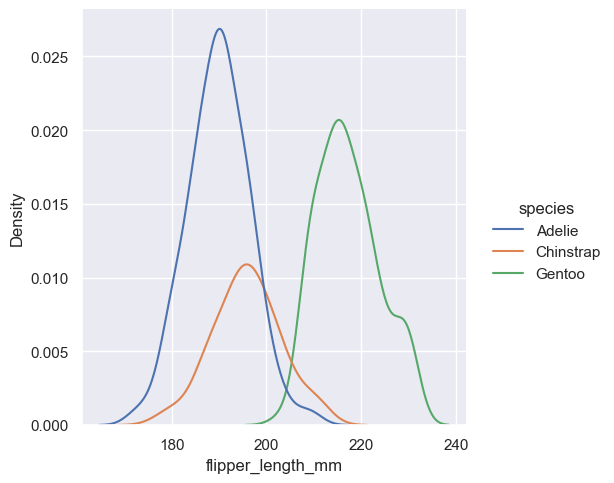

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

在許多情況下，分層 KDE 比分層直方圖更容易解釋，因此它通常是比較任務的好選擇：

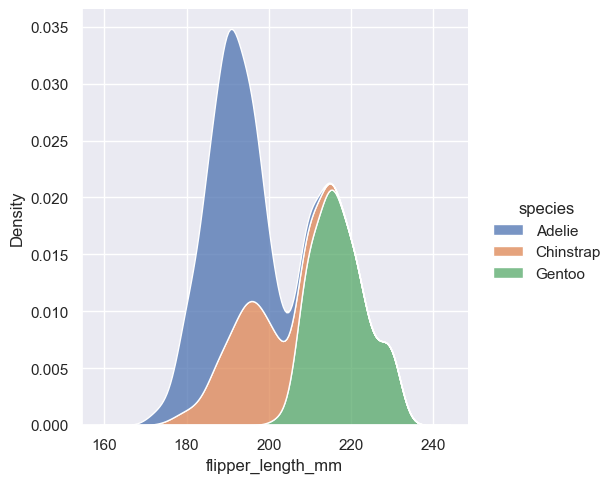

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

請注意預設情況下堆積圖如何填滿每條曲線之間的區域。儘管預設的 alpha 值（不透明度）會有所不同，但也可以填入單一或分層密度的曲線，以便更容易解析各個密度。

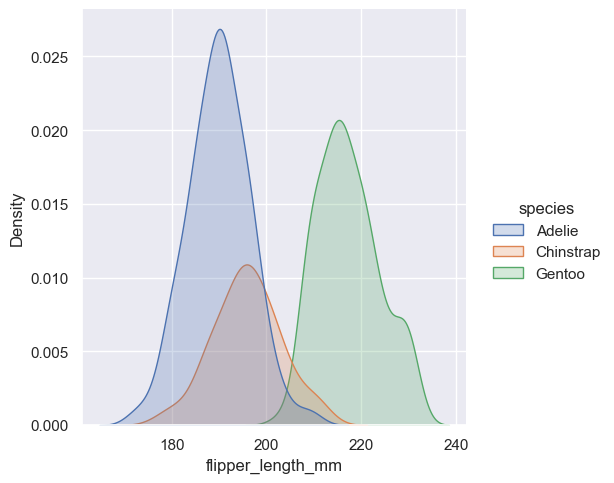

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### KDE的陷阱

對於離散資料或當資料自然連續但特定值被過度表示時，KDE 方法也會失敗。需要記住的重要一點是，即使資料本身不平滑，KDE 也始終會向您顯示平滑的曲線。例如，考慮鑽石重量的分佈：

In [ ]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


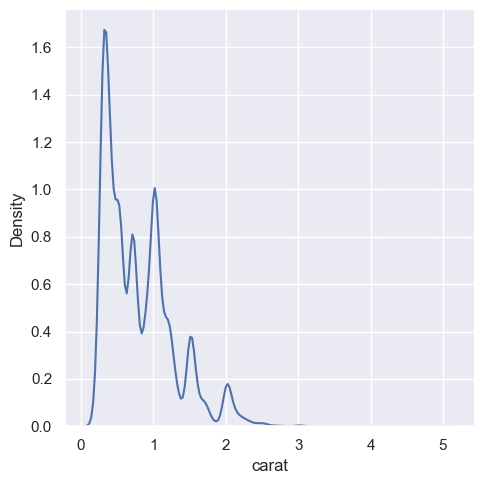

In [ ]:
sns.displot(diamonds, x="carat", kind="kde")

雖然 KDE 顯示特定值周圍存在峰值，但直方圖顯示出更鋸齒狀的分佈：

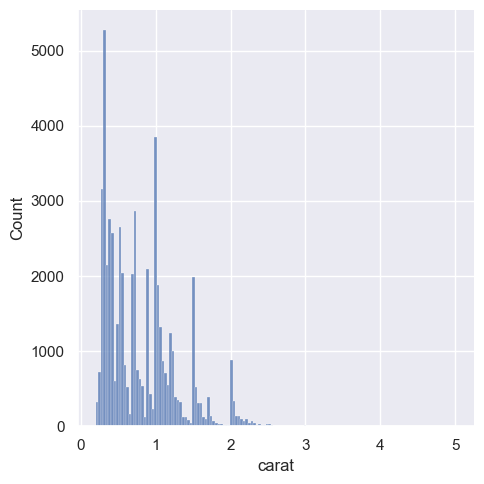

In [ ]:
sns.displot(diamonds, x="carat")

作為折衷方案，可以將這兩種方法結合起來。在直方圖模式下，displot()（與 histplot() 一樣）可以選擇包含平滑的 KDE 曲線（注意 kde=True，而不是 kind="kde"）：

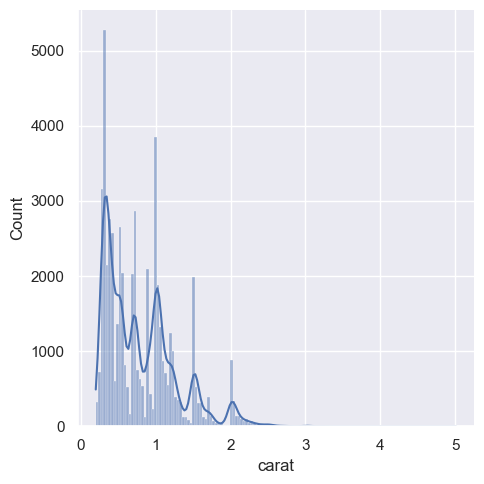

In [ ]:
sns.displot(diamonds, x="carat", kde=True)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

# Empirical cumulative distributions (經驗累積分佈)
可視化分佈的第三個選項是計算「經驗累積分佈函數」（ECDF）。此圖透過每個資料點繪製一條單調遞增曲線，使得曲線的高度反映具有較小值的觀測值的比例：

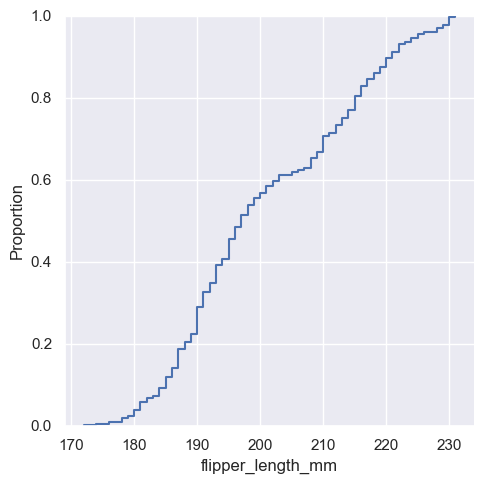

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

ECDF 圖有兩個主要優點。與直方圖或 KDE 不同，它直接表示每個資料點。這意味著無需考慮箱大小或平滑參數。此外，由於曲線是單調遞增的，因此它非常適合比較多個分佈：

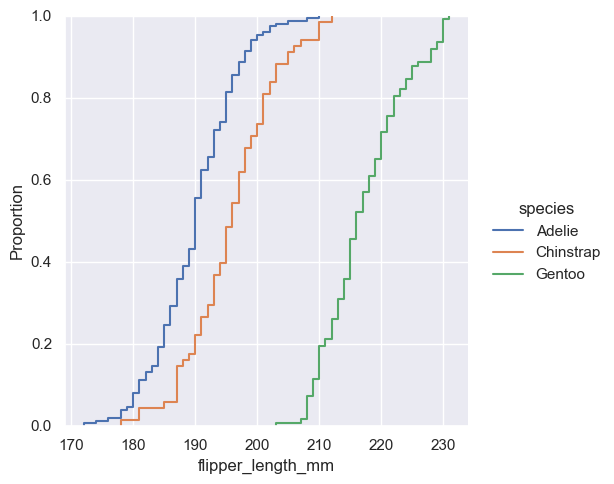

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

ECDF 圖的主要缺點是它表示分佈形狀的方式不如直方圖或密度曲線直觀。考慮一下鰭狀肢長度的雙峰性如何在直方圖中立即顯現出來，但要在 ECDF 圖中看到它，您必須尋找變化的斜率。儘管如此，透過練習，您可以透過檢查 ECDF 來學會回答有關分佈的所有重要問題，這樣做可能是一種強大的方法。

# 可視化二元分佈 (Visualizing bivariate distributions)
到目前為止，所有範例都考慮了單變數分佈：單一變數的分佈，可能以分配給色調的第二個變數為條件。然而，將第二個變數分配給 y 將繪製二元分佈：

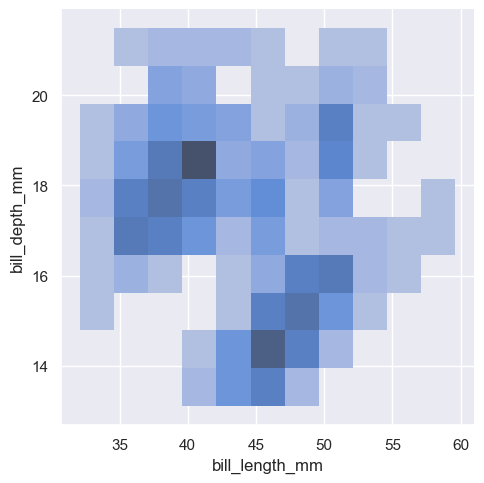

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

雙變量直方圖將資料分箱在平鋪繪圖的矩形內，然後以填滿顏色顯示每個矩形內的觀測值計數（類似 heatmap()）。類似地，雙變量 KDE 圖使用 2D 高斯平滑 (x, y) 觀測值。預設表示顯示二維密度的輪廓：

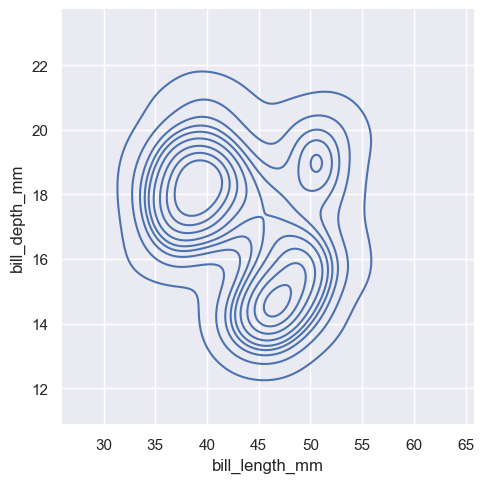

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

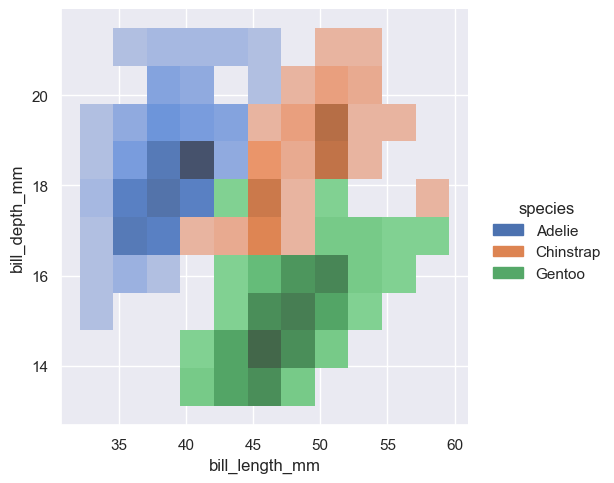

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

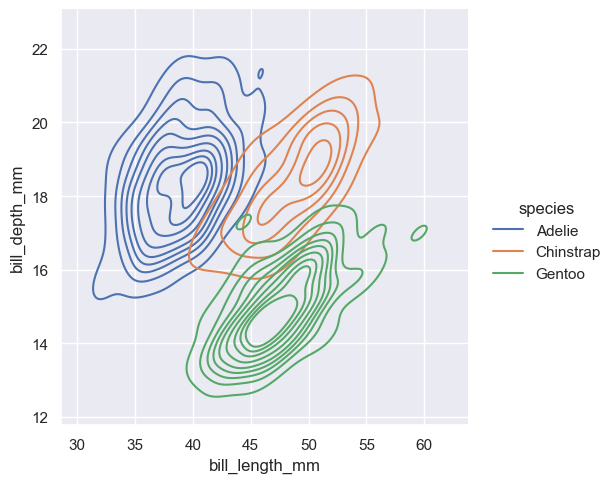

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

如單變量圖一樣，箱(bin)大小或平滑頻寬(smoothing bandwidth)的選擇將決定該圖表示基礎雙變量分佈的程度。應用相同的參數，但可以透過傳遞一對值來針對每個變數進行調整：

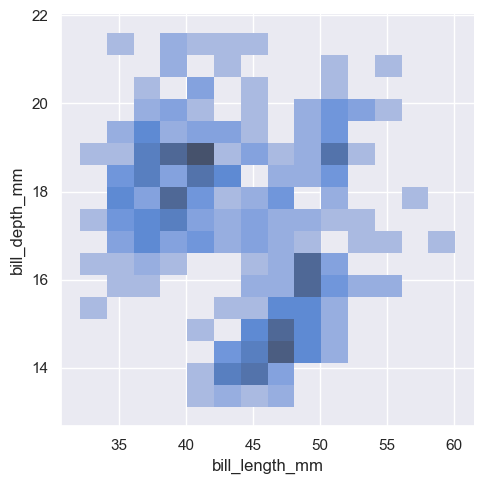

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

為了幫助解釋熱圖，請新增色條以顯示計數和顏色強度之間的對應：

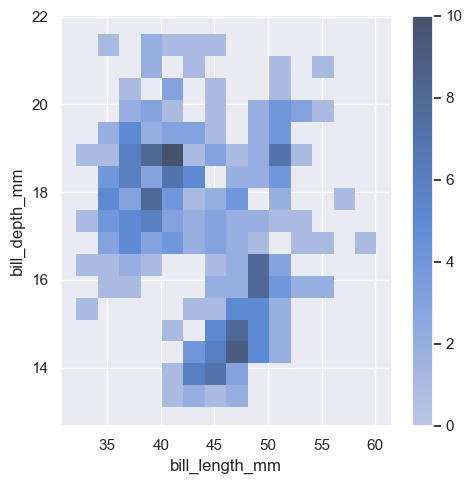

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

雙變數密度等值線的意思較不直覺。由於密度不可直接解釋，因此等值線是按密度的等比例繪製的，這意味著每條曲線都顯示一個水平集，使得密度的某個比例 p 位於其下方。 p 值均勻分佈，最低等級由 thresh 參數控制，數量由等級控制：

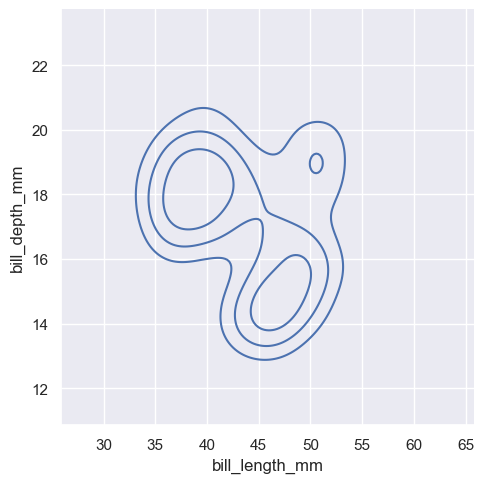

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

level 參數也接受值列表，以進行更多控制：

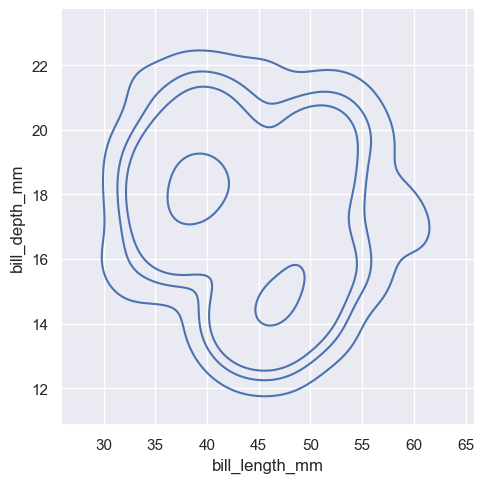

In [ ]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

雙變量直方圖允許一個或兩個變數是離散的。繪製一個離散變數和一個連續變數提供了另一種比較條件單變數分佈的方法：

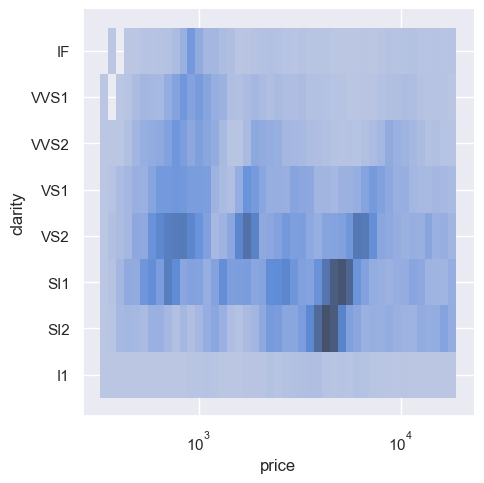

In [ ]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

相反，繪製兩個離散變數是顯示觀察值的交叉列表的簡單方法：

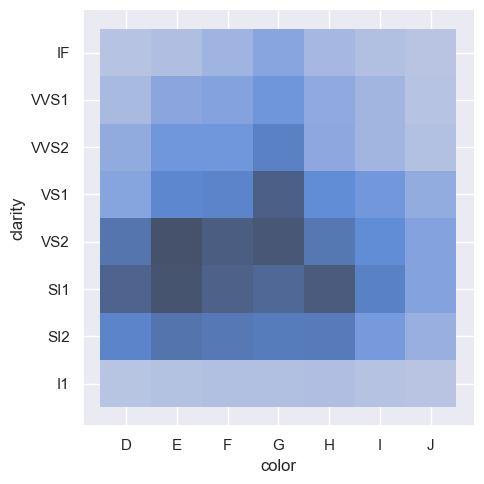

In [ ]:
sns.displot(diamonds, x="color", y="clarity")

# 其他設定中的分佈視覺化(Distribution visualization in other settings)

### 繪製聯合分佈和邊緣分佈(Plotting joint and marginal distributions)

第一個是 jointplot()，它用兩個變數的邊際分佈來增強二元關係圖或分佈圖。預設情況下，jointplot() 使用 scatterplot() 表示二元分佈，使用 histplot() 表示邊際分佈：

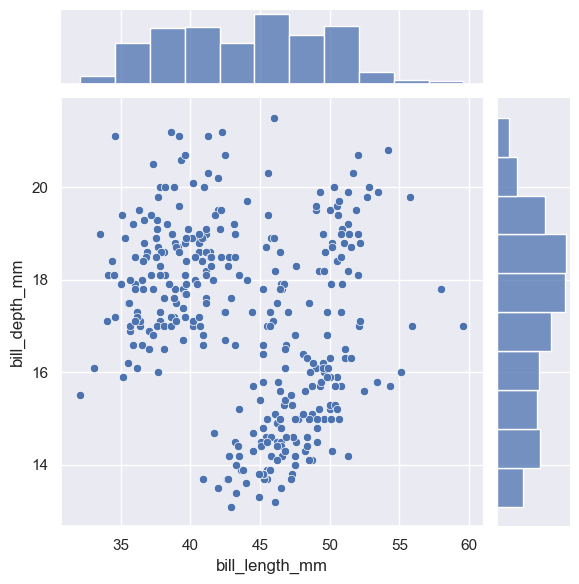

In [ ]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

與 displot() 類似，在 jointplot() 中設定不同的 kind="kde" 將更改使用 kdeplot() 的聯合圖和邊緣圖：

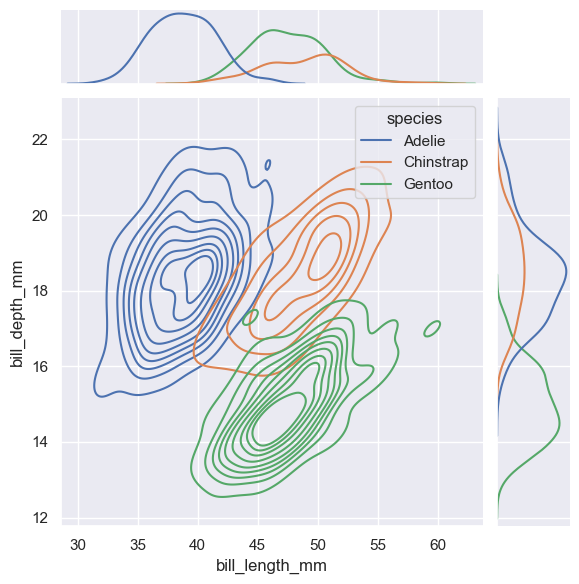

In [ ]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

jointplot() 是 JointGrid 類別的便捷接口，直接使用時提供更大的靈活性：

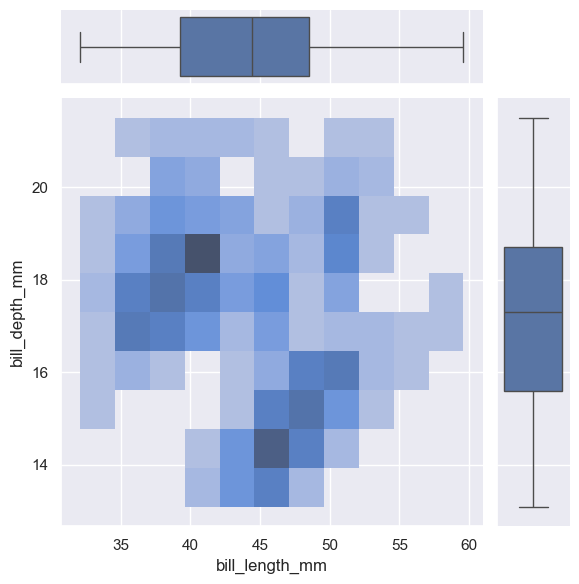

In [ ]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

### 繪製多維分佈(Plotting many distributions)
pairplot() 函數提供了類似的聯合分佈(joint distributions)和邊緣分佈(marginal distributions)的混合。然而，pairplot() 並不關注單一關係，而是使用「小多重(small-multiple)」方法來視覺化資料集中所有變數的單變數分佈及其所有成對關係：

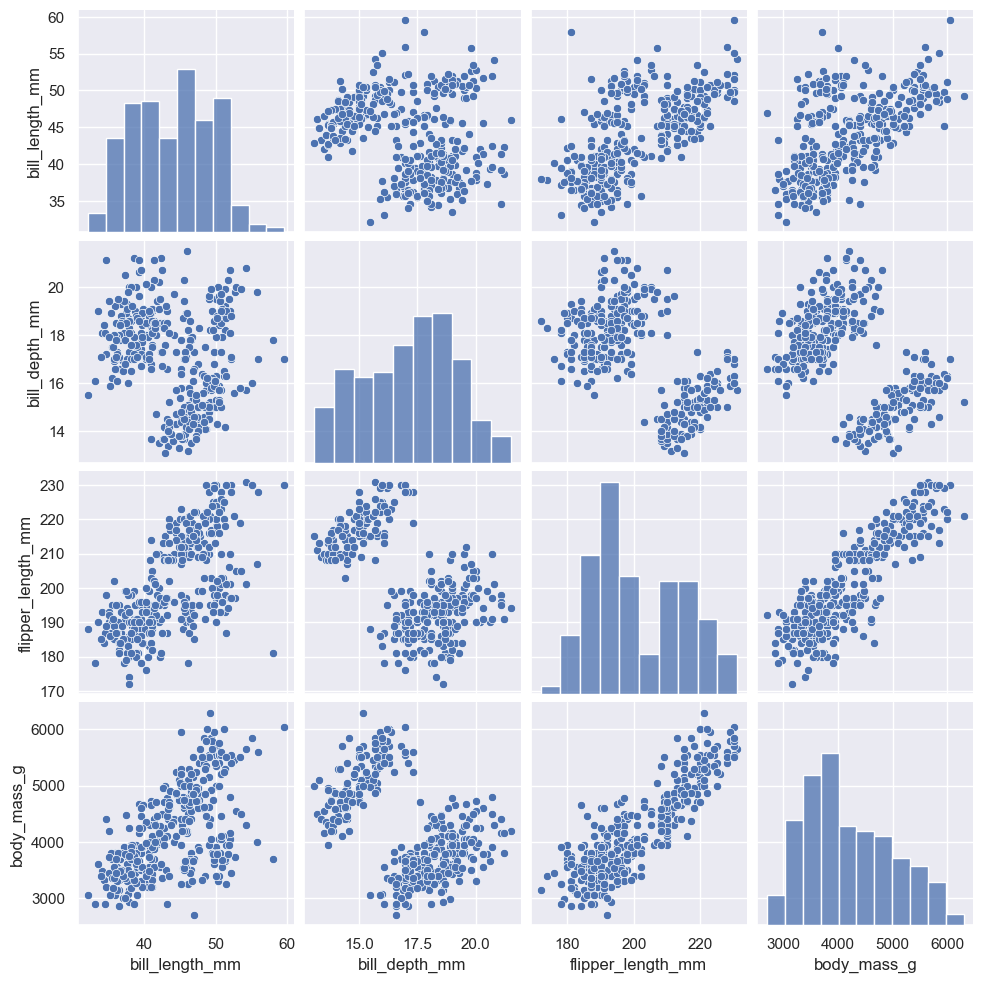

In [ ]:
sns.pairplot(penguins)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()

與 jointplot()/JointGrid 一樣，直接使用底層 PairGrid 只需多輸入一點即可提供更大的靈活性：

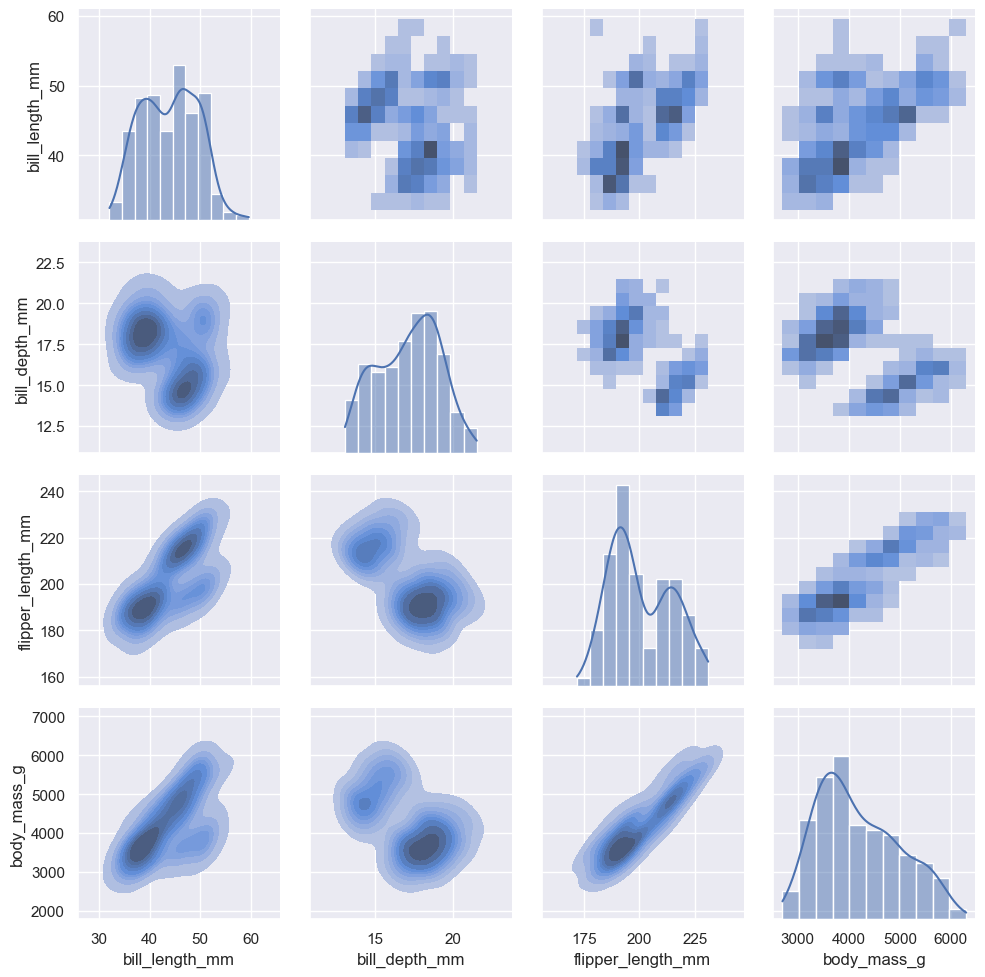

In [ ]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [ ]:
#練習題
#使用下面資料，仿造上圖來繪圖
iris = sns.load_dataset("iris")
iris.head()